In [450]:
import pandas as pd


In [451]:
dados = pd.read_csv('Dados/aluguel_residencial_08.csv',sep=';')

# Obtendo Dados complementares 
 Limites dos bairros do Rio de Janeiro
 
 Disponibilizados pelo https://www.data.rio/

https://www.data.rio/datasets/PCRJ::limite-de-bairros/explore?location=-22.916601%2C-43.444800%2C10.92


In [452]:
limite_bairros = pd.read_csv('Dados/Limite_de_Bairros.csv', sep=',')

## Tratando a base de dados
 - Limpeza 
 - Renomeando 
 

In [453]:
limite_bairros.drop(['OBJECTID', 'Área', 'AREA_PLANE', 'CODBAIRRO',
                   'CODRA', 'CODBNUM','REGIAO_ADM', 'LINK',  'Cod_RP', 'CODBAIRRO_LONG',
                   'SHAPESTArea', 'SHAPESTLength'], axis=1, inplace = True )

In [454]:
limite_bairros.rename(columns={'NOME':'Bairro','RP':'Regiao'}, inplace = True)

In [455]:
# Retirando os espaços em branco dos str.

limite_bairros['Bairro'] = limite_bairros.Bairro.str.lstrip()
limite_bairros['Bairro'] = limite_bairros.Bairro.str.rstrip()

limite_bairros['Regiao'] = limite_bairros.Regiao.str.lstrip()
limite_bairros['Regiao'] = limite_bairros.Regiao.str.rstrip()

###  Analisando a Base de Dados

In [456]:
bairros_rio = limite_bairros.Bairro.unique().shape[0]
bairros_rio
print('Quantidade de bairros Rio de Janeiro: ',bairros_rio)

Quantidade de bairros Rio de Janeiro:  164


In [457]:
bairros_aluguel = dados.Bairro.unique().shape[0]
print('Quantidade de bairros imobiliaria: ',bairros_aluguel)

Quantidade de bairros imobiliaria:  152


In [458]:
bairros_encontrados = limite_bairros.Bairro.isin(dados.Bairro).sum()
print('Quantidade de bairros encontrados: ',bairros_encontrados)

Quantidade de bairros encontrados:  137


In [459]:
print('Quantidade de bairros não encontrados: ', bairros_aluguel - bairros_encontrados)

Quantidade de bairros não encontrados:  15


In [461]:
tab_bairros = dados.Bairro.unique()
tab_bairros = pd.DataFrame(tab_bairros)
tab_bairros.rename(columns={0:"Bairro"}, inplace=True)

## Unindo DataFrames

In [485]:
df_bairros = tab_bairros.merge(limite_bairros, on = "Bairro", how = "left")
df_bairros.head()

,Bairro,Regiao
0,Copacabana,Zona Sul
1,Jardim Botânico,Zona Sul
2,Centro,Centro
3,Higienópolis,Inhaúma
4,Cachambi,Méier


In [486]:
df_bairros[df_bairros.Regiao.isnull()]['Bairro']

18                    Jardim Oceânico
20                          Península
47                 Ilha do Governador
49                       Oswaldo Cruz
78                             Fátima
83                       Braz de Pina
111                          Arpoador
114                            Icaraí
122                  Largo do Machado
124    Freguesia (Ilha do Governador)
128                           Turiaçu
133                             Usina
140                        Cachamorra
149                      Rio da Prata
150                     Cidade Jardim
Name: Bairro, dtype: object

In [509]:
limite_bairros[limite_bairros.Bairro.str.contains('Catete')]

,Bairro,Regiao
120,Catete,Zona Sul


In [511]:
# Criando um Dicionário para preencher os dados ausentes (busca realizada no Google)

dic_bairros = {'Jardim Oceânico':'Barra da Tijuca',
            'Península':'Barra da Tijuca',
            'Ilha do Governador':'Ilha do Governador',
            'Oswaldo Cruz':'Madureira',
            'Fátima':'Centro',
            'Braz de Pina':'Penha',
            'Arpoador':'Ipanema',
            'Icaraí':'Centro',
            'Largo do Machado':'Zona Sul',
            'Freguesia (Ilha do Governador)':'Ilha do Governador',
            'Turiaçu':'Madureira',
            'Usina':'Tijuca',
            'Cachamorra':'Campo Grande',
            'Rio da Prata':'Campo Grande',
            'Cidade Jardim':'Jacarepaguá'
              }

In [512]:
# Valores nulos

df_bairros[df_bairros.Regiao.isnull()==True]['Regiao'].index

Int64Index([], dtype='int64')

In [514]:
lista_nulos = [18, 20, 47, 49, 78, 83, 111, 114, 122, 124, 128, 133, 140, 149,150]

for valor in range(len(lista_nulos)):
    preencher = df_bairros.Bairro[lista_nulos[valor]]
    df_bairros['Regiao'][lista_nulos[valor]] = dic_bairros[preencher]


In [515]:
# Conferindo o preenchimento de valores nulos

df_bairros.iloc[lista_nulos,:]

,Bairro,Regiao
18,Jardim Oceânico,Barra da Tijuca
20,Península,Barra da Tijuca
47,Ilha do Governador,Ilha do Governador
49,Oswaldo Cruz,Madureira
78,Fátima,Centro
83,Braz de Pina,Penha
111,Arpoador,Ipanema
114,Icaraí,Centro
122,Largo do Machado,Zona Sul
124,Freguesia (Ilha do Governador),Ilha do Governador


In [516]:
dados['Regiao'] = 0

In [517]:
for nome in range(len(dados)):
    linha = df_bairros[df_bairros.Bairro == dados.Bairro[nome]].index[0]
    dados['Regiao'][nome] = df_bairros.Regiao[linha]


C:\Users\rodri\AppData\Local\Temp\ipykernel_1400\2556134370.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados['Regiao'][nome] = df_bairros.Regiao[linha]


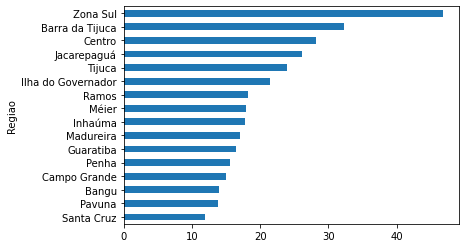

In [470]:
dados.groupby('Regiao').mean()['Valor_m2'].sort_values().plot(kind='barh');

### Salvando Base de Dados

In [520]:
dados.to_csv('Dados/aluguel_residencial_09.csv', sep=';', index=False)